# import all important libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

read csv from pc

In [2]:
dt=pd.read_csv("C:/Users/Asus/Desktop/kaggle_titanic/train.csv")

In [3]:
dt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,8,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30,C148,C


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    int64  
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 83.7+ KB


### by appying feature engineering and remove unwanted features

In [5]:
dt=dt.drop("Cabin",axis=1)
dt=dt.drop("PassengerId",axis=1)
dt=dt.drop("Name",axis=1)
dt=dt.drop("Ticket",axis=1)
# dt=dt.drop("Sex",axis=1)

### change emarked feature  into categorie variables

In [6]:
dt.Embarked=pd.Categorical(dt["Embarked"])
dt["Embarked_code"]=dt.Embarked.cat.codes 
dt=dt.drop("Embarked",axis=1)
dt.Embarked_code=pd.to_numeric(dt.Embarked_code)

### convert "sex" male=0 female=1

In [7]:
dt['Sex']=dt['Sex'].replace("male",1)
dt['Sex']=dt['Sex'].replace("female",0)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

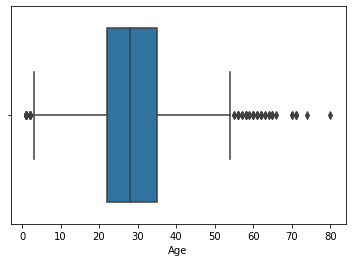

In [218]:
sns.boxplot(dt.Age)

In [ ]:
for i in dt.Age:

#### from above df info we seee that there are missing varibles "Age" and "Parch" ,"Fare"

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp'>

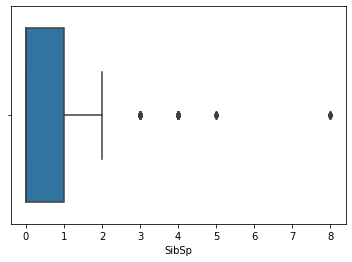

In [219]:
sns.boxplot(dt.SibSp)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch'>

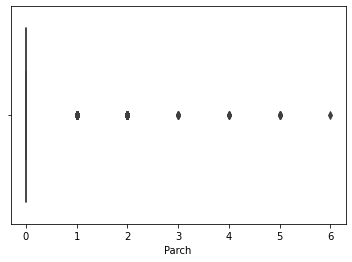

In [220]:
sns.boxplot(dt.Parch)

In [8]:
dt['Age']=dt['Age'].fillna(0)
dt['Age']=dt['Age'].replace(0,28)
dt['Parch']=dt['Parch'].replace(np.NAN,0)
dt['Fare']=dt['Fare'].replace(np.NAN,14)
dt.Survived=dt.Survived.astype("int64")

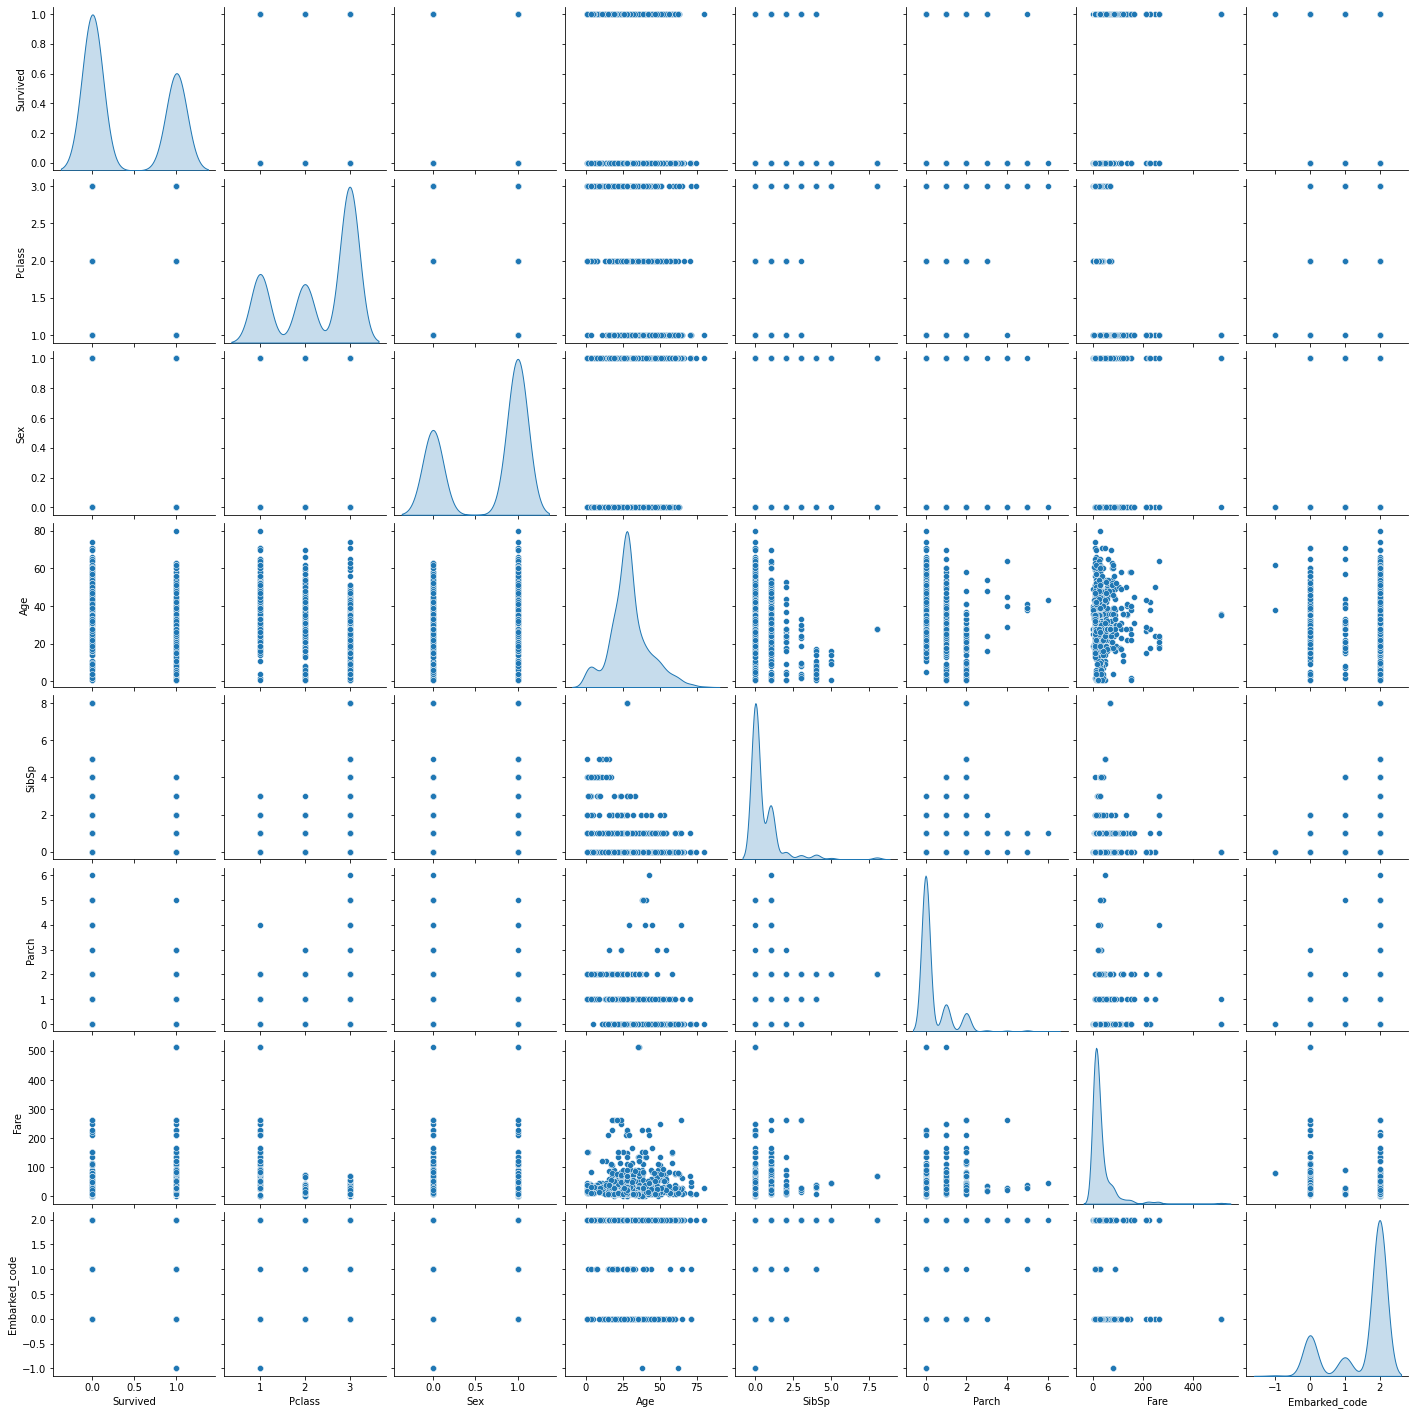

In [9]:
sns.pairplot(dt, diag_kind="kde")

In [10]:
dt["Embarked_code"]=dt["Embarked_code"].replace(-1,2)

In [11]:
dt.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Sex,891.0,0.647587,0.477990,0.0,0.0,1.0,1.0,1.0
Age,891.0,29.404040,12.985236,1.0,22.0,28.0,35.0,80.0
SibSp,891.0,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Fare,891.0,32.263749,49.686919,0.0,8.0,14.0,31.0,512.0
Embarked_code,891.0,1.536476,0.791503,0.0,1.0,2.0,2.0,2.0


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

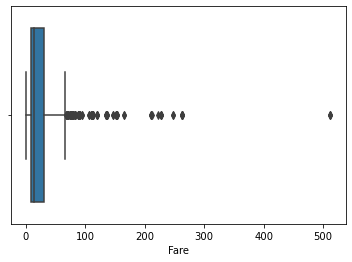

In [117]:
sns.boxplot(dt.Fare)

In [120]:

def doultier(dataset):
    ds_new=[]
    thresold=3;
    mean=np.mean(dataset)
    std=np.std(dataset)
    for i in dataset:
        if(i>=60):
            ds_new.append(60)
        else:
            ds_new.append(i)
    return ds_new
dset=dt.Fare.to_numpy()
dt.Fare=doultier(dset)


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

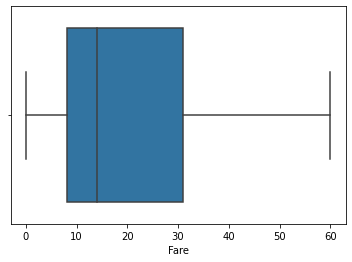

In [121]:
sns.boxplot(dt.Fare)

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
sd=LogisticRegression
y=dt.Survived.to_numpy()
x=dt.drop("Survived",axis=1).to_numpy()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [166]:
y_train=y_train.reshape(668,1)

In [167]:
lea_r=0.01
iterations=10000
m=668
theta=np.random.randn(7,1)
len_l=len(y_test)
theta


array([[-1.00859566],
       [ 0.43965433],
       [-0.33689481],
       [-1.79113939],
       [ 0.57205985],
       [-0.25782285],
       [-0.3751935 ]])

In [168]:
def fun_sigmoid(z):
    p=1/(1+np.exp(-z))
    p=np.maximum(p,0.001)
    p=np.minimum(p,0.999)
    return p;

In [179]:
def calc_pred(theta,x):
    z=np.dot(x,theta)
    return fun_sigmoid(z)

In [180]:
for iteration in range(iterations):
    y_pre=calc_pred(theta,x_train)
    chg=y_train-y_pre
    gradient=(-(np.dot(np.transpose(x_train),chg))/m)
    theta=theta-lea_r*gradient

In [181]:
theta

array([[ 0.31374432],
       [-3.05200572],
       [-0.00632519],
       [-0.87816505],
       [-0.20624959],
       [ 0.10090362],
       [-0.01958765]])

In [182]:
y_pre=x_test.dot(theta)

In [183]:
for i in range(len(y_pre)):
    if(y_pre[i]<=0.7):
        y_pre[i]=0
    if(y_pre[i]>0.7):
        y_pre[i]=1

In [184]:
accuracy_score(y_pre,y_test)

0.7802690582959642

In [185]:
pt2=pd.read_csv("C:/Users/Asus/Desktop/kaggle_titanic/test.csv")

In [186]:
pid=pt2.PassengerId

In [187]:
pt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          333 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [188]:
pt2['Age']=pt2['Age'].fillna(0)
pt2['Age']=pt2['Age'].replace(0,30)
pt2['Parch']=pt2['Parch'].replace(np.NAN,0)
pt2['Fare']=pt2['Fare'].replace(np.NAN,14)
pt2=pt2.drop("Cabin",axis=1)
pt2=pt2.drop("PassengerId",axis=1)
pt2=pt2.drop("Name",axis=1)
pt2['Sex']=pt2['Sex'].replace("male",1)
pt2['Sex']=pt2['Sex'].replace("female",0)

In [189]:
pt2["Age"]=pd.to_numeric(dt["Age"])
pt2.Embarked=pd.Categorical(pt2["Embarked"])


In [190]:
pt2["Embarked_code"]=pt2.Embarked.cat.codes
pt2=pt2.drop("Embarked",axis=1)

In [191]:
pt2.Embarked_code=pd.to_numeric(pt2.Embarked_code)
pt2=pt2.drop("Ticket",axis=1)

In [192]:
pt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         418 non-null    int64  
 1   Sex            418 non-null    int64  
 2   Age            418 non-null    float64
 3   SibSp          418 non-null    int64  
 4   Parch          418 non-null    int64  
 5   Fare           418 non-null    float64
 6   Embarked_code  418 non-null    int8   
dtypes: float64(2), int64(4), int8(1)
memory usage: 20.1 KB


In [209]:
x_t=pt2.to_numpy()

In [210]:
y_t=x_t.dot(theta)

In [211]:
for i in range(len(y_t)):
    if(y_t[i]>=0.6):
        y_t[i]=1
    if(y_t[i]<0.6):
        y_t[i]=0
        

In [212]:
y_t_n=[]
for i in y_t:
    y_t_n.append(int(i))
    

In [213]:
ydf=pd.Series(y_t_n,name="Survived")
ydf.head()

0    0
1    0
2    0
3    0
4    1
Name: Survived, dtype: int64

In [214]:
pdf=pd.DataFrame({"PassengerId":[pid]})

In [215]:
k=pd.concat(
    [pid,ydf],axis=1)

In [216]:
k.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [217]:
k.to_csv("C:/Users/ASUS/Desktop/pred.csv")